# Setup

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
%matplotlib inline

Istogramma Frequenze Assolute

Analizzando le frequenze di campionamento dei file audio nel dataset, abbiamo notato che la maggior parte di essi è campionata a 32 kHz. Pertanto, abbiamo considerato l'opzione di ridurre la frequenza di campionamento per gli audio campionati a frequenze superiori.
<br><br>
Ci sono diverse ragioni per cui questa decisione è vantaggiosa:
1. **Mantenimento della coerenza:** Uniformando la frequenza di campionamento di tutti gli audio marini a 32 kHz, garantiamo una maggiore coerenza e uniformità nel dataset. Questo semplifica l'analisi e la manipolazione dei dati, garantendo una base omogenea per il lavoro successivo.
<br><br>
2. **Riduzione della complessità:** Il downsampling degli audio a 32 kHz può essere più efficiente e richiedere meno risorse computazionali rispetto all'upsampling a 384 kHz. Questo non solo rende il processo più pratico ed economico, ma può anche ridurre la complessità computazionale complessiva.
<br><br>
3. **Prevenzione delle distorsioni:** Abbassando la frequenza di campionamento degli audio a 32 kHz, si limita il rischio di generare artefatti o distorsioni che potrebbero manifestarsi durante l'upsampling. Mantenendo una frequenza di campionamento più vicina a quella prevalente nel dataset, si riducono le possibilità di compromettere la qualità dell'audio originale. Ciò risulta essenziale per preservare l'integrità e la fedeltà dei dati audio nel corso dell'analisi.



File letti: 2665/Non-Target
Frequenze audio lette con successo.
Totale file audio: 2665


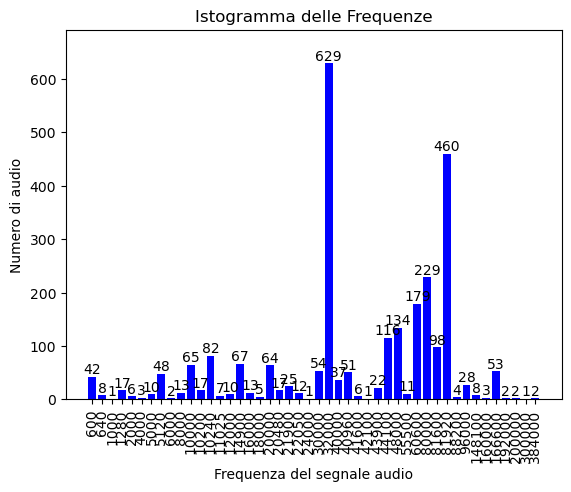

In [1]:
from Set_Data.Lettura_Freq import frequenze
import matplotlib.pyplot as plt

# Ottieni il dizionario di frequenze e numero di audio associato
frequencies = frequenze()

# Estrai le chiavi (frequenze) e i valori (numero di audio) dal dizionario
frequency_values = list(frequencies.keys())
audio_numbers = list(frequencies.values())

# Ordina le frequenze e i numeri di audio in base alle frequenze
sorted_indices = sorted(range(len(frequency_values)), key=lambda k: frequency_values[k])
sorted_frequency_values = [frequency_values[i] for i in sorted_indices]
sorted_audio_numbers = [audio_numbers[i] for i in sorted_indices]

# Crea il grafico a barre
bars = plt.bar(range(len(sorted_frequency_values)), sorted_audio_numbers, color='blue')

# Aggiungi le etichette delle frequenze sotto le barre
plt.xticks(range(len(sorted_frequency_values)), sorted_frequency_values, rotation='vertical')

plt.xlabel('Frequenza del segnale audio')
plt.ylabel('Numero di audio')
plt.title('Istogramma delle Frequenze')

# Imposta l'asse y con uno spazio aggiuntivo per l'annotazione più alta
max_audio_number = max(sorted_audio_numbers)
plt.ylim(0, max_audio_number * 1.1)  # Aumenta l'asse y del 10%

# Aggiungi annotazioni sopra le barre
for bar, audio_count in zip(bars, sorted_audio_numbers):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(audio_count),
             ha='center', va='bottom', color='black')

plt.show()  # Mostra il grafico

In [1]:
import re
from Set_Data.Lettura_Durata import audio_info
import matplotlib.pyplot as plt

# Ottieni le informazioni audio
audio_info_dict = audio_info()

# Estrai i nomi dei file e le durate
file_names = list(audio_info_dict.keys())
durations_minutes = [duration[0] + duration[1] / 60 for duration in audio_info_dict.values()]  # Durata in minuti

# Raggruppiamo le durate in intervalli crescenti
intervals = [(f"{i*5}-{(i+1)*5} secondi", sum(1 for dur in durations_minutes if i*5 <= dur < (i+1)*5)) for i in range(12)]

# Convertiamo i dati di durata da minuti a secondi per gli intervalli da 30 a 60 secondi
durations_seconds = [dur * 60 for dur in durations_minutes[600:]]

# Aggiungiamo l'intervallo da 1 a 10 minuti
intervals.append(("1-10 minuti", sum(1 for dur in durations_seconds if 1 * 60 <= dur < 10 * 60)))

# Aggiungiamo gli intervalli da 10 a 30 minuti
intervals.extend([(f"{(i+1)*10}-{(i+2)*10} minuti", sum(1 for dur in durations_seconds if (i+1)*10 * 60 <= dur < (i+2)*10 * 60)) for i in range(2)])


# Aggiungiamo l'intervallo da 30 a 60 minuti
intervals.append(("30-60 minuti", sum(1 for dur in durations_seconds if 30 * 60 <= dur <= 60 * 60)))

# Estraiamo i dati per il grafico
labels, counts = zip(*intervals)

# Creiamo il grafico a barre
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='skyblue')

# Aggiungiamo l'annotazione del testo sopra ciascuna barra
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
             ha='center', va='bottom', fontsize=8, color='black')

plt.xlabel('Durata')
plt.ylabel('Numero di Audio')
plt.title('Distribuzione delle Durate dei File Audio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

File letto: 1 - Nome: AHD_Airmar.wav, Durata: 0 min 6 sec
File letto: 2 - Nome: 20171128c-28_190038.wav, Durata: 5 min 30 sec
File letto: 3 - Nome: 20171227a-66_110853.wav, Durata: 10 min 44 sec
File letto: 4 - Nome: 20171127a-24_105442.wav, Durata: 29 min 10 sec
File letto: 5 - Nome: 20171210-49_49.wav, Durata: 3 min 10 sec
File letto: 6 - Nome: 20171104-1_200959.wav, Durata: 10 min 36 sec
File letto: 7 - Nome: 20171128-25_052238.wav, Durata: 15 min 21 sec
File letto: 8 - Nome: 20171205-44_145246.wav, Durata: 6 min 40 sec
File letto: 9 - Nome: 20171221-61_114923.wav, Durata: 4 min 0 sec


KeyboardInterrupt: 

In [1]:
from Set_Data.Lettura_Durata import audio_info

# Dati casuali di durata degli audio
audio_info_dict = {
    "audio1": (3, 30),   # Durata: 3 minuti e 30 secondi
    "audio2": (0, 45),   # Durata: 45 secondi
    "audio3": (10, 15),  # Durata: 10 minuti e 15 secondi
    "audio4": (25, 0),   # Durata: 25 minuti
    "audio5": (0, 20),   # Durata: 20 secondi
    "audio6": (5, 10),   # Durata: 5 minuti e 10 secondi
    "audio7": (2, 0),    # Durata: 2 minuti
    "audio8": (30, 0),   # Durata: 30 minuti
    "audio9": (1, 55)    # Durata: 1 minuto e 55 secondi
}


# Raggruppamento degli audio in intervalli
intervals = {
    "0-5 secondi": [],
    "5-10 secondi": [],
    "10-15 secondi": [],
    "15-20 secondi": [],
    "20-25 secondi": [],
    "25-30 secondi": [],
    "30-35 secondi": [],
    "35-40 secondi": [],
    "40-45 secondi": [],
    "45-50 secondi": [],
    "50-55 secondi": [],
    "55-60 secondi": [],
    "1-10 minuti": [],
    "10-20 minuti": [],
    "20-30 minuti": [],
    "30-60 minuti": []
}

# Inserimento degli audio negli intervalli corrispondenti
for audio, duration in audio_info_dict.items():
    total_seconds = duration[0] * 60 + duration[1]  # Durata totale in secondi
    if total_seconds < 5:
        intervals["0-5 secondi"].append((audio, total_seconds))
    elif total_seconds < 10:
        intervals["5-10 secondi"].append((audio, total_seconds))
    elif total_seconds < 15:
        intervals["10-15 secondi"].append((audio, total_seconds))
    elif total_seconds < 20:
        intervals["15-20 secondi"].append((audio, total_seconds))
    elif total_seconds < 25:
        intervals["20-25 secondi"].append((audio, total_seconds))
    elif total_seconds < 30:
        intervals["25-30 secondi"].append((audio, total_seconds))
    elif total_seconds < 35:
        intervals["30-35 secondi"].append((audio, total_seconds))
    elif total_seconds < 40:
        intervals["35-40 secondi"].append((audio, total_seconds))
    elif total_seconds < 45:
        intervals["40-45 secondi"].append((audio, total_seconds))
    elif total_seconds < 50:
        intervals["45-50 secondi"].append((audio, total_seconds))
    elif total_seconds < 55:
        intervals["50-55 secondi"].append((audio, total_seconds))
    elif total_seconds < 60:
        intervals["55-60 secondi"].append((audio, total_seconds))
    elif total_seconds < 600:
        intervals["1-10 minuti"].append((audio, total_seconds))
    elif total_seconds < 1200:
        intervals["10-20 minuti"].append((audio, total_seconds))
    elif total_seconds < 1800:
        intervals["20-30 minuti"].append((audio, total_seconds))
    else:
        intervals["30-60 minuti"].append((audio, total_seconds))

# Calcolo della media per ciascun intervallo e stampa dell'elenco degli audio
for interval, audio_list in intervals.items():
    print(f"Range {interval}, Media degli audio della sottoclasse: {sum(duration for _, duration in audio_list) / len(audio_list):.2f} secondi")
    print("Audio:")
    for audio, duration_seconds in audio_list:
        minutes = duration_seconds // 60
        seconds = duration_seconds % 60
        print(f"- {audio}: {int(minutes)} minuti {int(seconds)} secondi")
    print()


ZeroDivisionError: division by zero

TypeError: unsupported operand type(s) for +: 'int' and 'str'